<!-- Notebook Header Start -->

<h1 align="center">Changes to Noxious Stimuli by means of Dorsal Root Ganglion Stimulation</h1>

<p align="center">
  <strong>Author:</strong> Karl Bates<br>
  <strong>Date:</strong> 2024-12-06<br>
  <strong>Affiliation:</strong> Carnegie Mellon University, Cohen-Karni Lab  || Neuromechatronics Lab
</p>

---


## 📊 Notebook Outline

* **Importing libraries & data**
* **Preprocess neurophysiology recordings for spike sorting**
* **Package preprocessed data for spike sorting using Kilosort4**
* **Run Kilosort to extract spike activity**
* **Calculate average firing rate of each cluster during noxious stimuli**
* **Compare the firing rates of clusters before and after noxious stimuli**

## 📚 References & Additional Resources

- [Kilosort4 docs](https://github.com/MouseLand/Kilosort/tree/main)
- [SpikeInterface docs](https://github.com/SpikeInterface)

---

<!-- Notebook Header End -->


# ➡ Importing Libraries & Data
---

In [1]:
# standard imports
from pathlib import Path
import os
from kilosort import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# custom imports
from automations import RM1
from automations import SpikeInterface_wrapper
from automations import Kilosort_wrapper
from automations import plots
from automations import analysis_functions


# I DON'T HAVE TO REDO THE ENTIRE ANALYSIS OMGGGGG
import importlib

# Make a change in von_frey_analysis.py ...

importlib.reload(plots)


<module 'automations.plots' from 'c:\\Users\\Karl\\Documents\\_Python\\CMU.49.003-Spike-Sorting-Kilosort\\automations\\plots.py'>

### probe definition

Using the spreadsheet, `Adapter_pinout.xlsx`, the contact ID's can be traced to the "device channel", and we can assign them on the probe. 

In this case, our channel indices correspond to the aux inputs to the intan headstage.

refer to the notebook, `RM1_pipeline.ipynb` within  the `dev_notebook` folder

In [2]:
PROBE_DIRECTORY = Path(r'D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.001 A1x32-Edge-5mm-20-177-A32\A1x32-Edge-5mm-20-177-A32.prb')

### filepath definitions

In [3]:
# NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
# in this case, the data is saved in a folder with multiple rats
DATA_DIRECTORY = Path(fr'D:\SynologyDrive\CMU.80 Data\82 External Data\82.002 Sample Rat Data from RM1 Project')  
# Create path if it doesn't exist
DATA_DIRECTORY.mkdir(parents=True, exist_ok=True)

# NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
# save data to the inbox; make sure that the folders: binary & figures exist
SAVE_DIRECTORY_DW322 = Path(fr'D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.006 Von Vrey Analysis\DW322') 
SAVE_DIRECTORY_DW323 = Path(fr'D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.006 Von Vrey Analysis\DW323') 
SAVE_DIRECTORY_DW327 = Path(fr'D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.006 Von Vrey Analysis\DW327') 
# Create paths if they don't exist
SAVE_DIRECTORY_DW322.mkdir(parents=True, exist_ok=True)
SAVE_DIRECTORY_DW323.mkdir(parents=True, exist_ok=True)
SAVE_DIRECTORY_DW327.mkdir(parents=True, exist_ok=True)


# 📈 Preprocess data using SpikeInterface

This is used to determine which trial is most likely to produce good units in a spike sorting analysis

---

### 🐀 importing the rats

In [4]:
DW322 = RM1.Rat(DATA_DIRECTORY, PROBE_DIRECTORY, "DW322")
DW323 = RM1.Rat(DATA_DIRECTORY, PROBE_DIRECTORY, "DW323")
DW327 = RM1.Rat(DATA_DIRECTORY, PROBE_DIRECTORY, "DW327")

Reading DRGS_10_240918_140034...
Error reading stream 2 for DRGS_10_240918_140034. continuing...
Reading DRGS_11_240918_140803...
Error reading stream 2 for DRGS_11_240918_140803. continuing...
Reading DRGS_12_240918_141655...
Error reading stream 2 for DRGS_12_240918_141655. continuing...
Reading DRGS_1_240918_125448...
Error reading stream 2 for DRGS_1_240918_125448. continuing...
Reading DRGS_2_240918_130024...
Error reading stream 2 for DRGS_2_240918_130024. continuing...
Reading DRGS_3_240918_130835...
Error reading stream 2 for DRGS_3_240918_130835. continuing...
Reading DRGS_4_240918_131552...
Error reading stream 2 for DRGS_4_240918_131552. continuing...
Reading DRGS_5_240918_132233...
Error reading stream 2 for DRGS_5_240918_132233. continuing...
Reading DRGS_6_240918_132920...
Error reading stream 2 for DRGS_6_240918_132920. continuing...
Reading DRGS_7_240918_133719...
Error reading stream 2 for DRGS_7_240918_133719. continuing...
Reading DRGS_8_240918_134529...
Error readin

### 📄 metadata

#### DW322

In [5]:
DW322.qst_experiment_notes

'd1 tl, d2 am sync, a1 am monitor,a2 evf'

In [6]:
DW322.qst_trial_notes

5,Trial Number,Condition,amp,PW (us),Freq. (Hz),drgDur. (s),Stimuli,temp,Stimuli Dur.,NaN
Trial Number,,,,,,,,,,
1,1,VF,51,300,5,180,vf,NaN,30,accidentally named DRGS_13
2,2,VF,51,300,20,180,vf,NaN,30,NaN
3,3,VF,51,300,100,180,vf,NaN,30,NaN
4,4,VF,51,300,100,180,vf,NaN,30,NaN
5,5,VF,51,300,5,180,vf,NaN,30,NaN
6,6,VF,51,300,20,180,vf,NaN,30,NaN
7,7,VF,51,300,5,180,vf,NaN,30,NaN
8,8,VF,51,300,100,180,vf,NaN,30,NaN
9,9,VF,51,300,20,180,vf,NaN,30,NaN


#### DW323

In [7]:
DW323.qst_experiment_notes

'd1 tl, d2 am sync, a1 am monitor,a2 evf'

In [8]:
DW323.qst_trial_notes

5,Trial Number,Condition,amp,PW (us),Freq. (Hz),drgDur. (s),Stimuli,temp,Stimuli Dur.,NaN,NaN
Trial Number,,,,,,,,,,,
1,1,VF,70,300,5,180,vf,NaN,30,pos 1,pad just prximal from toe
2,2,VF,70,300,20,180,vf,NaN,30,pos 1,NaN
3,3,VF,70,300,100,180,vf,NaN,30,pos 1,NaN
4,4,VF,70,300,100,180,vf,NaN,30,pos 2,toes
5,5,VF,70,300,5,180,vf,NaN,30,pos 2,NaN
6,6,VF,70,300,20,180,vf,NaN,30,pos 2,NaN
1,1,QST,70,300,100,180,QST,52,5s at 60,NaN,NaN
2,2,QST,70,300,5,180,QST,52,5s at 60,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### DW327

In [9]:
DW327.qst_experiment_notes

'd1 tl, d2 am sync, a1 am monitor,a2 evf'

In [10]:
DW327.qst_trial_notes

5,Trial Number,Condition,amp,PW (us),Freq. (Hz),drgDur. (s),Stimuli,temp,Stimuli Dur.
Trial Number,,,,,,,,,
1,1,vf,63,300,5,180,vf,NaN,pp dur 30
2,2,NaN,63,300,100,180,vf,NaN,paw
3,3,NaN,63,300,100,180,vf,NaN,paw
4,4,NaN,63,300,5,180,vf,NaN,paw
5,5,NaN,63,300,20,180,vf,NaN,paw
6,6,NaN,63,300,20,180,vf,NaN,paw
7,7,NaN,63,300,5,180,vf,NaN,toe
8,8,NaN,63,300,100,180,vf,NaN,toe
9,9,NaN,63,300,100,180,vf,NaN,paw


### ↩ preprocess spinal cord data & export results to binary

⚠ !!this section is commented out, since I already have this done!!
I don't remove

preprocess

In [11]:
DW322.get_sc_data()
DW322.get_analog_data()
DW322.remove_drg_stim_window_sc()
DW322.remove_drg_stim_window_analog()

DW323.get_sc_data()
DW323.get_analog_data()
DW323.remove_drg_stim_window_sc()
DW323.remove_drg_stim_window_analog()

DW327.get_sc_data()
DW327.get_analog_data()
DW327.remove_drg_stim_window_sc()
DW327.remove_drg_stim_window_analog()

Error processing nn_seond_insertion_240911_144433: 'end_frame' must be fewer than number of samples in parent: 809728
Error processing nn_seond_insertion_240911_144433: 'end_frame' must be fewer than number of samples in parent: 809728


export to binary

DW322

In [12]:
signals_DW322 = SpikeInterface_wrapper(DW322, SAVE_DIRECTORY_DW322)
# trials = ["VF_1_240918_143256",
#           "VF_2_240918_143936",
#           "VF_3_240918_144658",
#           "VF_4_240918_145638",
#           "VF_5_240918_150137",
#           "VF_6_240918_150811",
#           "VF_7_240918_151516",
#           "VF_8_240918_152056",
#           "VF_9_240918_152753"]
# signals_DW322.save_spinalcord_data_to_binary(TRIAL_NAMES=trials)

Preparing SpikeInterface wrapper for rat DW322


DW323

In [13]:
signals_DW323 = SpikeInterface_wrapper(DW323, SAVE_DIRECTORY_DW323)
# trials = ["VF_1_240911_164342",
#           "VF_2_240911_165039",
#           "VF_3_240911_165617",
#           "VF_4_240911_170446",
#           "VF_5_240911_171014",
#           "VF_6_240911_171505",
#           "VF_7_240911_180931"]
# signals_DW323.save_spinalcord_data_to_binary(TRIAL_NAMES=trials)

Preparing SpikeInterface wrapper for rat DW323


DW327

In [14]:
signals_DW327 = SpikeInterface_wrapper(DW327, SAVE_DIRECTORY_DW327)
# trials = ["VF_1_241125_153746",
#           "VF_2_241125_154307",
#           "VF_3_241125_154841",
#           "VF_4_241125_155417",
#           "VF_5_241125_155941",
#           "VF_6_241125_160515",
#           "VF_7_241125_161126",
#           "VF_8_241125_161626",
#           "VF_9_241125_162141",
#           "VF_10_241125_162725"
#         ]
# signals_DW327.save_spinalcord_data_to_binary(TRIAL_NAMES=trials)

Preparing SpikeInterface wrapper for rat DW327


# 🧠 Extract spikes with Kilosort4, import the results back into Python for analysis

⚠ !!this section is commented out, since I already have this done!!

---

In [15]:
def my_custom_criteria(cluster_labels, st, clu, est_contam_rate, fs):
    # Example criteria: Contamination rate < 0.1 and firing rate between 0.5 and 50 Hz
    contam_good = est_contam_rate < 0.2
    fr_good = np.zeros(cluster_labels.size, dtype=bool)
    for i, c in enumerate(cluster_labels):
        spikes = st[clu == c]
        fr = spikes.size / ((spikes.max() - spikes.min()) / fs)
        if 0.5 <= fr <= 50:
            fr_good[i] = True
    return np.logical_and(contam_good, fr_good)

In [16]:
### DW322
spikes_DW322 = Kilosort_wrapper(SAVE_DIRECTORY_DW322, PROBE_DIRECTORY)
# # Run Kilosort and apply custom labels with custom criteria
# spikes.run_kilosort_trial_summary(new_settings="vf_settings",custom_criteria=my_custom_criteria)

### DW323
spikes_DW323 = Kilosort_wrapper(SAVE_DIRECTORY_DW323, PROBE_DIRECTORY)
# # Run Kilosort and apply custom labels with your custom criteria
# spikes.run_kilosort_trial_summary(new_settings="vf_settings",custom_criteria=my_custom_criteria)

### DW327
spikes_DW237 = Kilosort_wrapper(SAVE_DIRECTORY_DW327, PROBE_DIRECTORY)
# # Run Kilosort and apply custom labels with your custom criteria
# spikes.run_kilosort_trial_summary(new_settings="vf_settings",custom_criteria=my_custom_criteria)

Preparing Kilosort wrapper...
Preparing Kilosort wrapper...
Preparing Kilosort wrapper...


extract results

(again, I've already run kilosort so I can skip right to extracting the results)

In [17]:
spikes_DW322.extract_kilosort_outputs()
spikes_DW323.extract_kilosort_outputs()
spikes_DW237.extract_kilosort_outputs()

Kilosort outputs successfully loaded for trial: VF_1_240918_143256
Kilosort outputs successfully loaded for trial: VF_2_240918_143936
Kilosort outputs successfully loaded for trial: VF_3_240918_144658
Kilosort outputs successfully loaded for trial: VF_4_240918_145638
Kilosort outputs successfully loaded for trial: VF_5_240918_150137
Kilosort outputs successfully loaded for trial: VF_6_240918_150811
Kilosort outputs successfully loaded for trial: VF_7_240918_151516
Kilosort outputs successfully loaded for trial: VF_8_240918_152056
Kilosort outputs successfully loaded for trial: VF_9_240918_152753
Kilosort outputs successfully loaded for trial: VF_1_240911_164342
Kilosort outputs successfully loaded for trial: VF_2_240911_165039
Kilosort outputs successfully loaded for trial: VF_3_240911_165617
Kilosort outputs successfully loaded for trial: VF_4_240911_170446
Kilosort outputs successfully loaded for trial: VF_5_240911_171014
Kilosort outputs successfully loaded for trial: VF_6_240911_17

In [18]:
spikes_DW237.kilosort_results["VF_10_241125_162725"]["spike_times"]

array([     25,      60,      81, ..., 2099680, 2099701, 2099945],
      dtype=int64)

##### explanation of output files
- **`ops`**: Loads the Kilosort options dictionary, which includes parameters and processing information.
- **`cluster_amplitudes` & `contamination_percentage`**: Load cluster amplitudes and contamination percentages from TSV files.
- **`channel_mapping`**: Loads the mapping of electrode channels.
- **`templates`**: Loads the spike waveform templates.
- **`chan_best`**: Identifies the best (most representative) channel for each template by finding the channel with the maximum energy (sum of squared amplitudes).
- **`amplitudes`**: Loads the amplitudes of detected spikes.
- **`spike_times`**: Loads spike times, typically in sample indices.
- **`spike_clusters`**: Loads cluster assignments for each spike.
- **`firing_rates`**: Calculates the firing rate for each unit (cluster) by counting the number of spikes and normalizing by the total recording time.
- **`dshift`**: Extracts the drift shift values from the options dictionary, which indicates the movement of the recording probe over time.

# 📊 Calculate firing rate per cluster - `DW327`

---

### steps
        1. Extracts Von Frey windows.
        2. Subdivides into sub-windows.
        3. Computes average voltage for each sub-window.
        4. Computes unit firing rates for each sub-window.
        5. Classifies sub-windows into 'pre-stim' (first 35s) and 'post-stim' (last 35s).
        6. calculates the Pearson correlation coefficient between von frey and inverse spike intervals (ISI)
        7. saves cluster firing rate, inverse ISI, and von frey data for each sub-window, and classification of "pre-stim" or "post-stim" to excel

In [19]:
VF_test = analysis_functions.VonFreyAnalysis(DW327, signals_DW327, spikes_DW237)


# VF_test.extract_von_frey_windows() # this works, but it also runs when I run the extract_cluster_firing_rates
# VF_test.compute_unit_firing_rates()
# VF_test.extract_von_frey_windows()

# Extract the main Von Frey windows
# intervals_dict = VF_test.extract_von_frey_windows()

# Subdivide the windows into smaller sub-windows of a chosen width (e.g., 0.5 seconds)
# subwindows_dict = VF_test.subdivide_intervals(VF_test.extract_von_frey_windows(), subwindow_width=0.5)

# Compute average voltage and unit firing rates for these smaller sub-windows
# The analyze_subwindows method internally calls subdivide_intervals, compute_average_von_frey_voltage, and compute_unit_firing_rates_for_subwindows
VF_test.analyze_subwindows(subwindow_width=0.5,corr_threshold=0.1)

# # to look at the results, you can use the dictionary keys like this:
# avg_voltage_df = results["VF_10_241125_162725"]["avg_voltage_df"]
# firing_rates_df = results["VF_10_241125_162725"]["firing_rates_df"]

{'VF_10_241125_162725': {'avg_voltage_df':       avg_voltage      group
  0   226447.390625   pre-stim
  1   226939.781250   pre-stim
  2   287137.437500   pre-stim
  3   339680.593750   pre-stim
  4   515688.375000   pre-stim
  ..            ...        ...
  64  483454.500000  post-stim
  65  391476.812500  post-stim
  66  514316.093750  post-stim
  67  542111.687500  post-stim
  68  342131.375000  post-stim
  
  [69 rows x 2 columns],
  'firing_rates_df':                         0          1          2           3          4  \
  0                0.000000   0.000000   0.000000    0.000000   0.000000   
  1              121.951220   0.000000   0.000000  121.951220   0.000000   
  2               66.000000  24.000000  26.000000   50.000000   2.000000   
  3               52.000000  36.000000  44.000000   46.000000   2.000000   
  4               50.000000  40.000000  46.000000   48.000000   2.000000   
  ...                   ...        ...        ...         ...        ...   
  66    

In [20]:
# # if you want to look into the data, you can use the dictionary keys like this:
# avg_voltage_df = VF_test.windowed_results["VF_9_241125_162141"]["avg_voltage_df"]
# firing_rates_df = VF_test.windowed_results["VF_9_241125_162141"]["firing_rates_df"]

#### raster plot & von frey

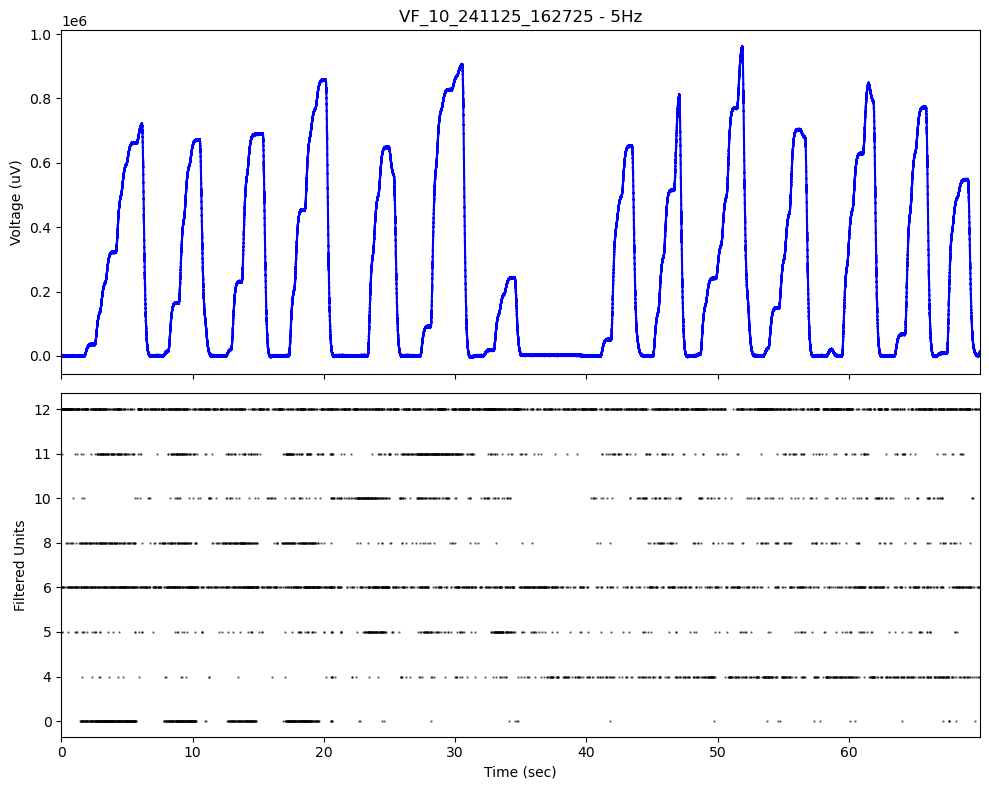

In [21]:
plots.plot_vf_spike_raster_filtered_units(VF_test, "VF_10_241125_162725",title="VF_10_241125_162725 - 5Hz")

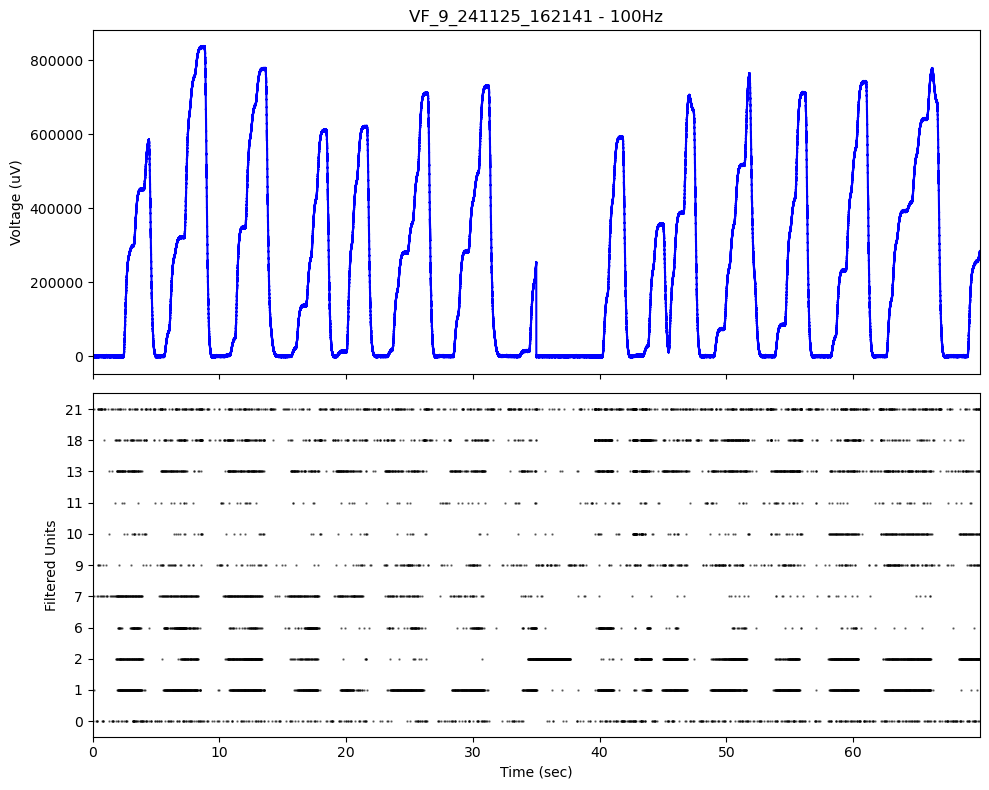

In [22]:
plots.plot_vf_spike_raster_filtered_units(VF_test, "VF_9_241125_162141",title="VF_9_241125_162141 - 100Hz")

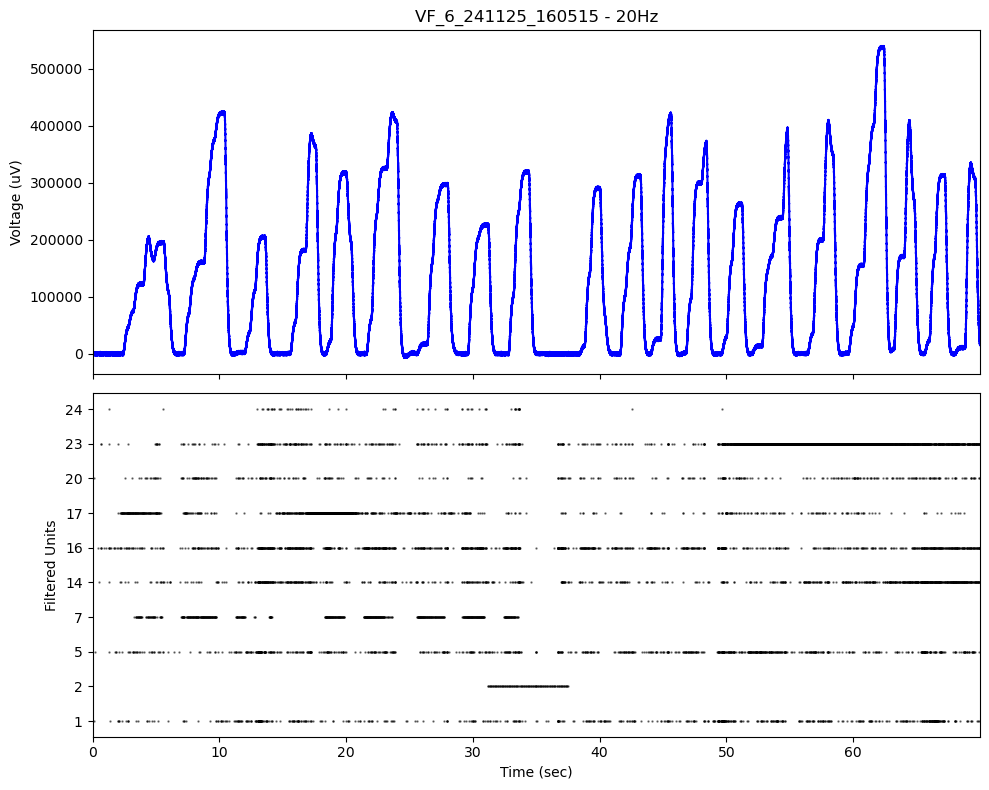

In [23]:
plots.plot_vf_spike_raster_filtered_units(VF_test, "VF_6_241125_160515",title="VF_6_241125_160515 - 20Hz")

#### plots per trial

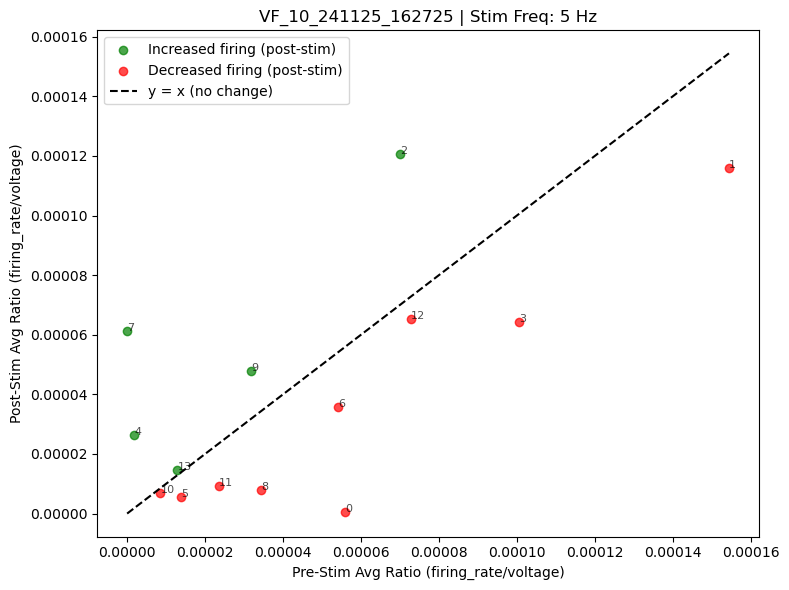

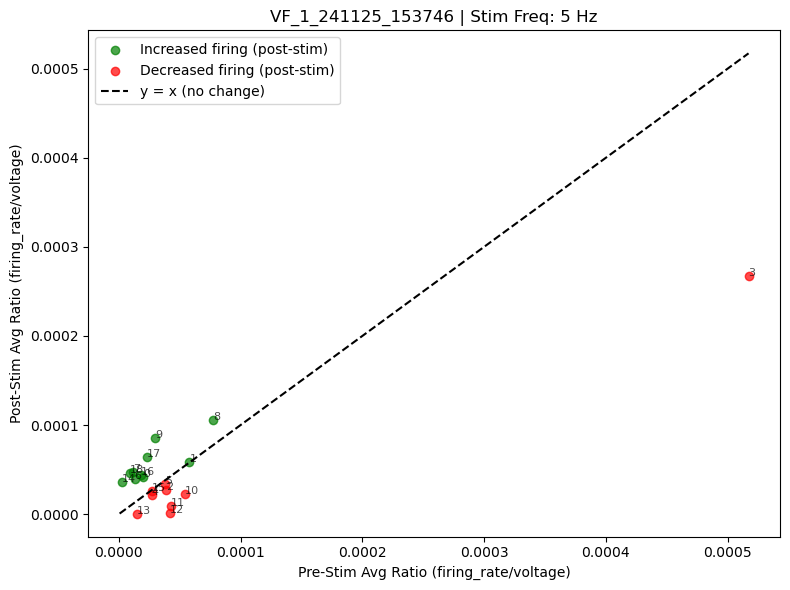

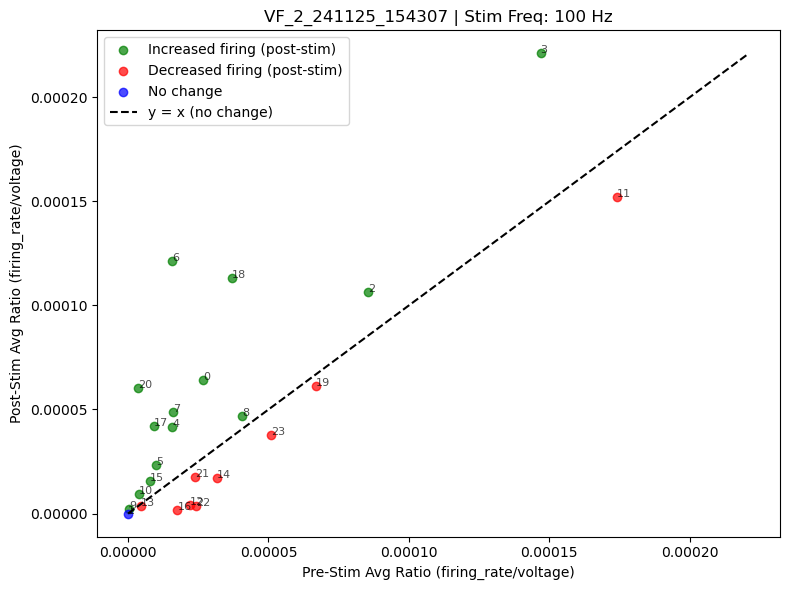

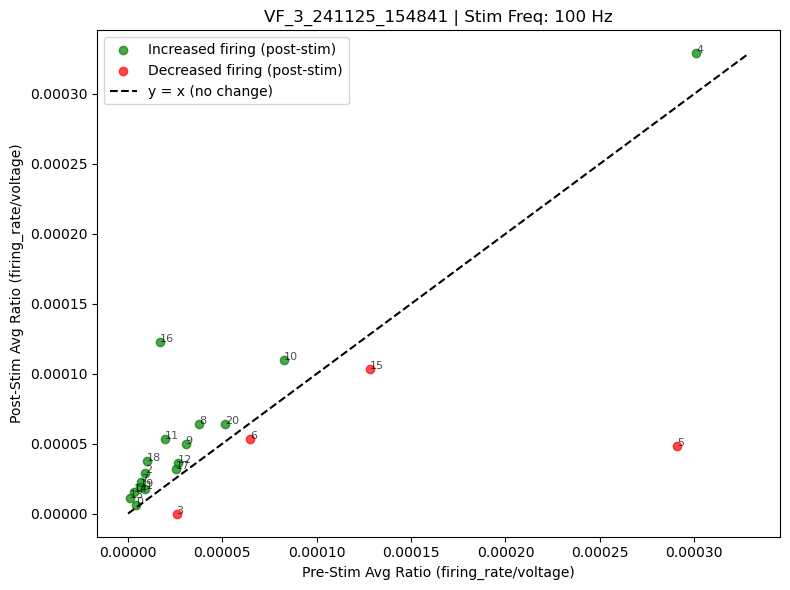

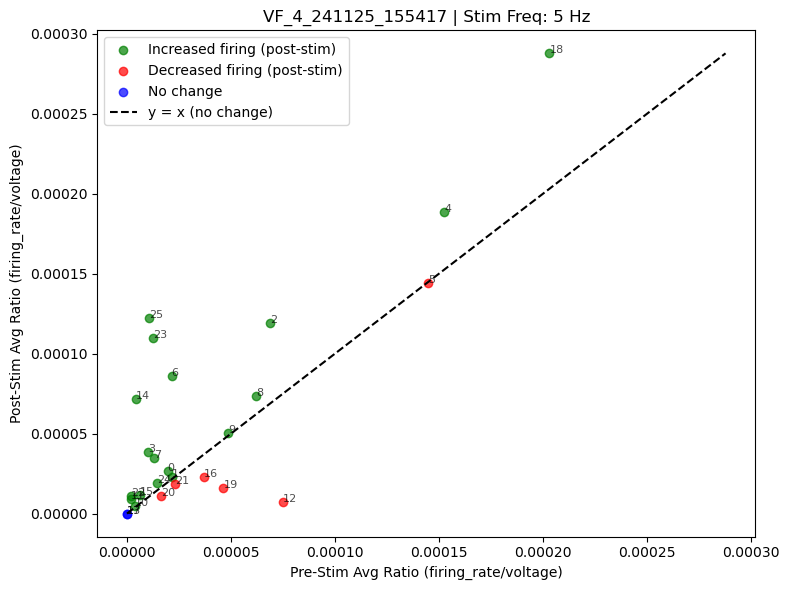

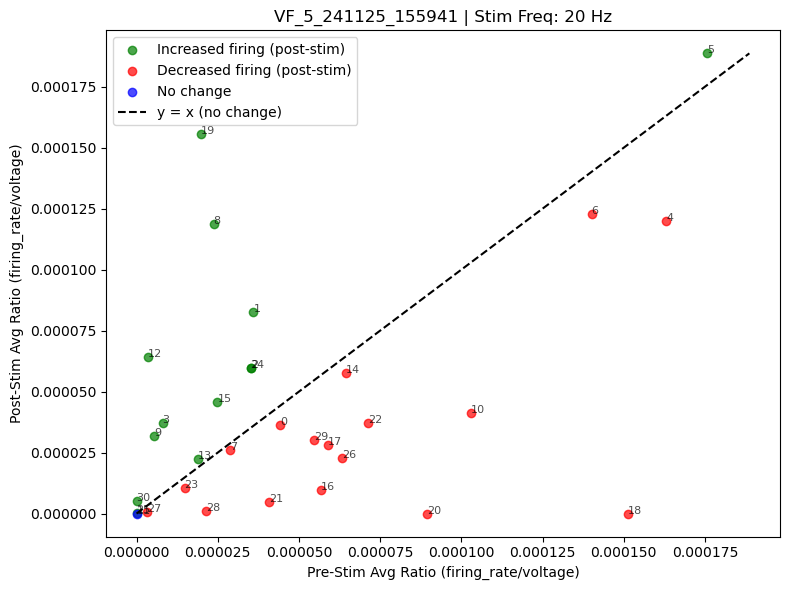

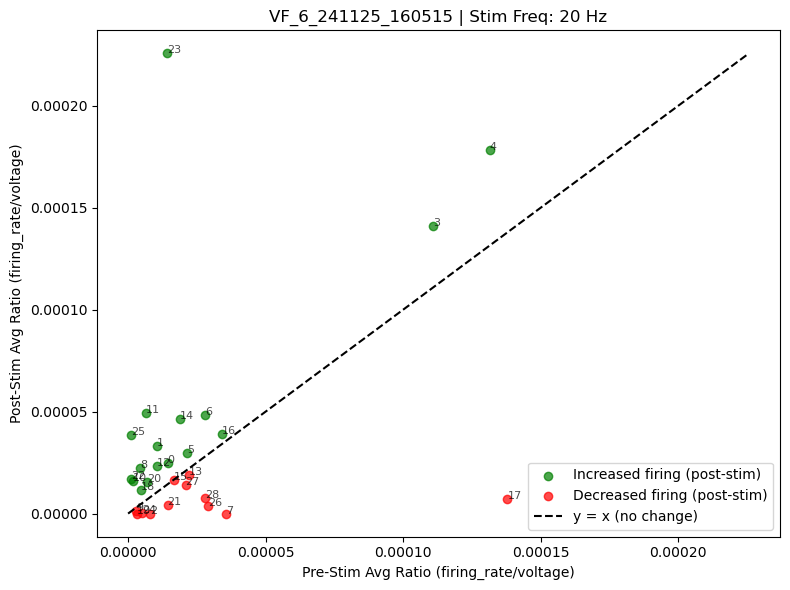

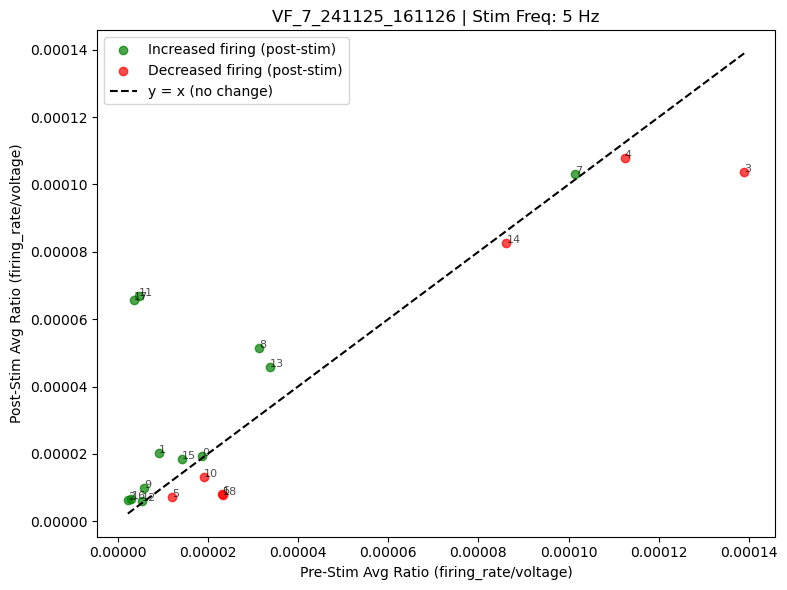

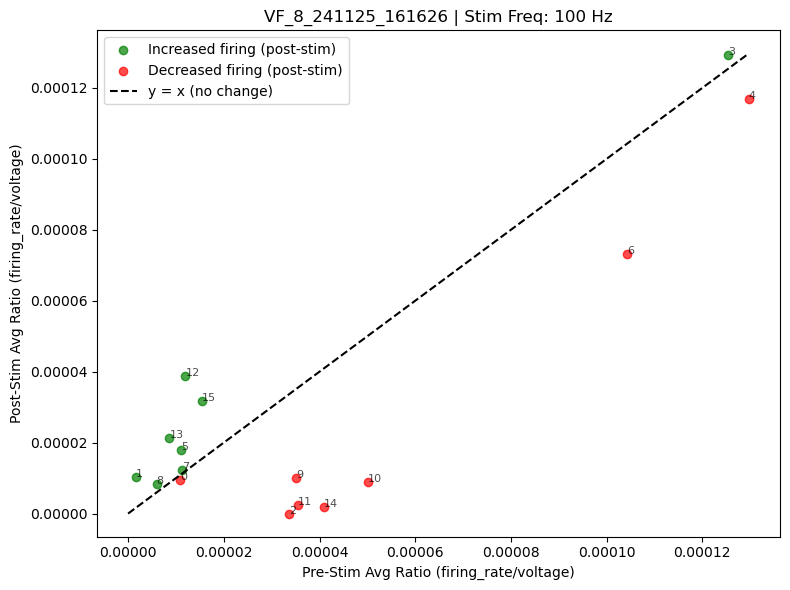

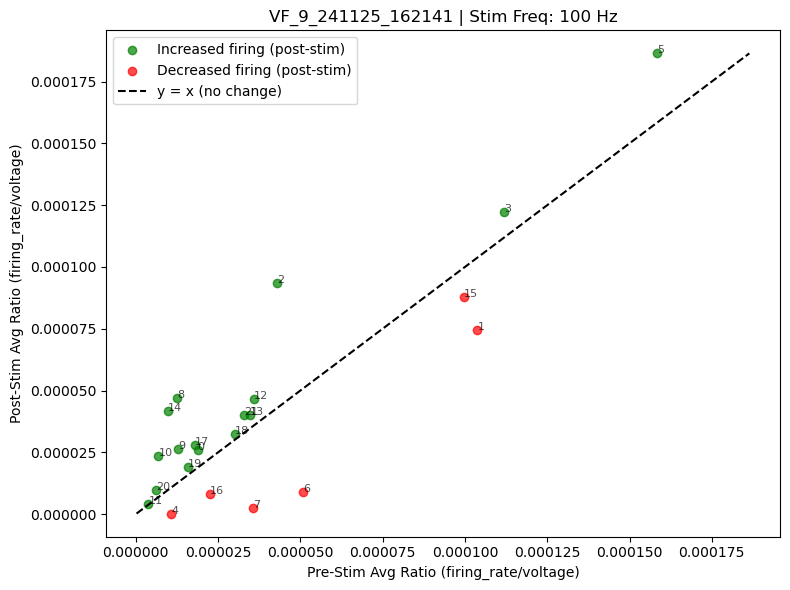

In [24]:
plots.vf_pre_post_stim_per_trial(VF_test)

#### plots - all trials in rat

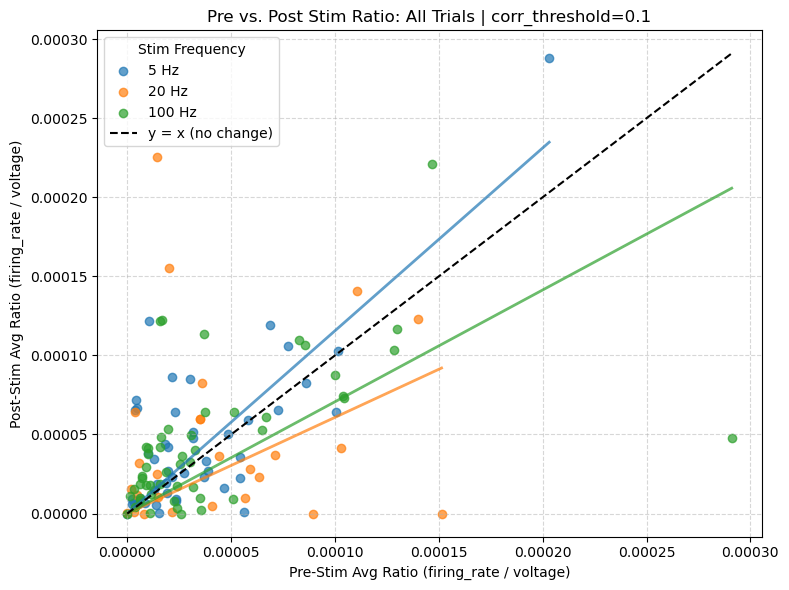

In [25]:
plots.vf_pre_post_stim_all_trials_correlated(VF_test)

# 📊 Calculate firing rate per cluster - `DW322`

---

In [26]:
VF_test = analysis_functions.VonFreyAnalysis(DW322, signals_DW322, spikes_DW322)
VF_test.analyze_subwindows(subwindow_width=0.5,corr_threshold=0.1)


{'VF_1_240918_143256': {'avg_voltage_df':       avg_voltage      group
  0   226600.000000   pre-stim
  1   226881.562500   pre-stim
  2   243538.781250   pre-stim
  3   226158.921875   pre-stim
  4   251939.531250   pre-stim
  ..            ...        ...
  67  449108.593750  post-stim
  68  570089.125000  post-stim
  69  635654.562500  post-stim
  70  600947.750000  post-stim
  71  253088.484375  post-stim
  
  [72 rows x 2 columns],
  'firing_rates_df':                        0          1          2          3          4  \
  0               0.000000   0.000000   0.000000   0.000000   0.000000   
  1               0.000000   0.000000   0.000000   0.000000   0.000000   
  2              14.548982  40.737148  14.548982  23.278371  17.458778   
  3               0.000000   0.000000   0.000000   0.000000   0.000000   
  4              22.000000   8.000000  22.000000  10.000000  52.000000   
  ...                  ...        ...        ...        ...        ...   
  69             42.000

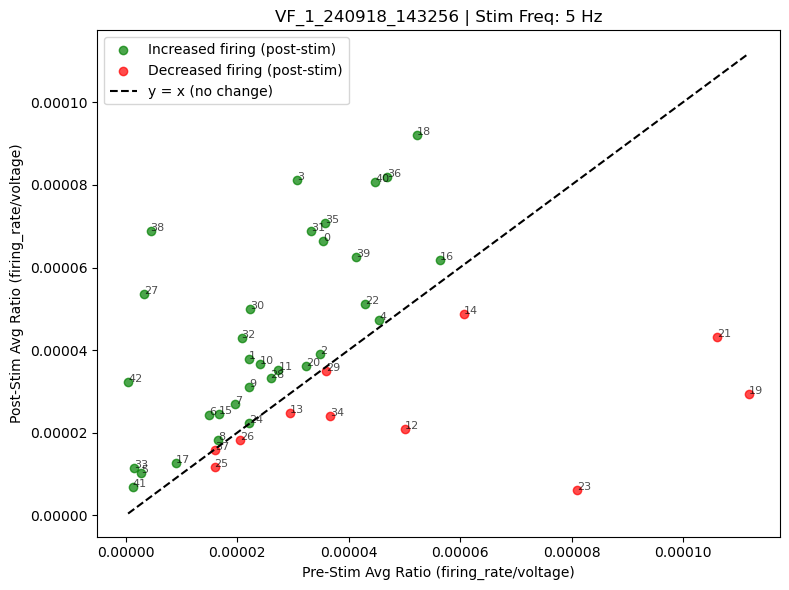

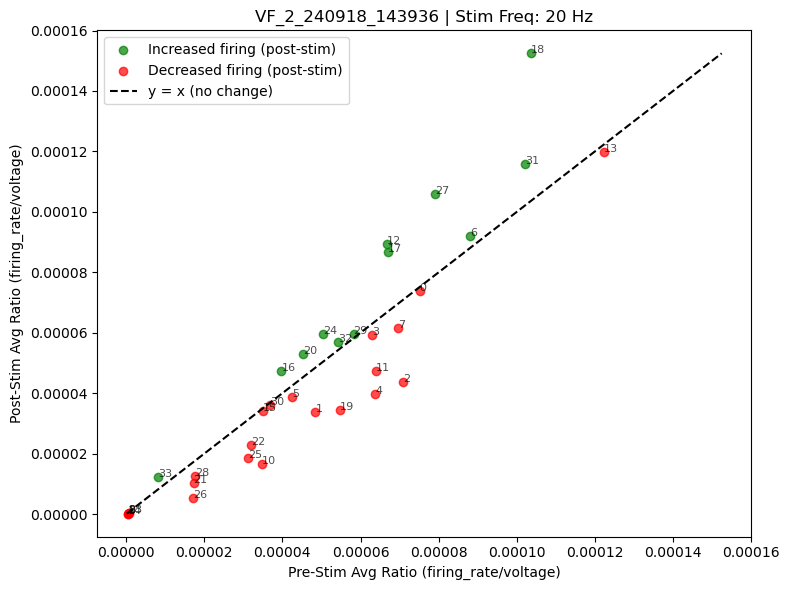

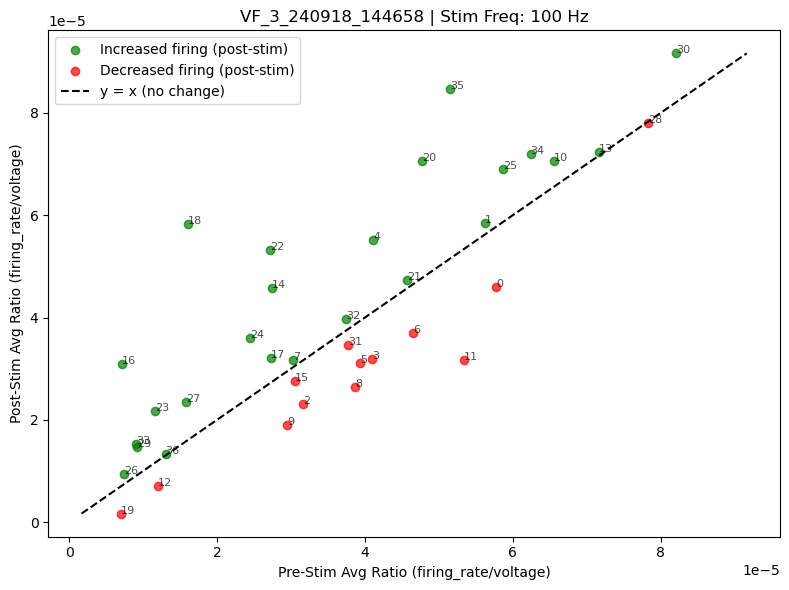

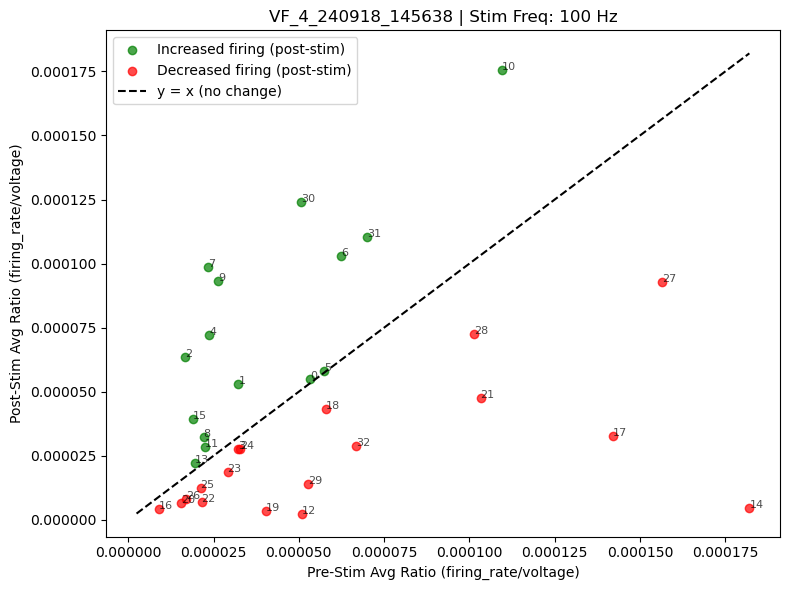

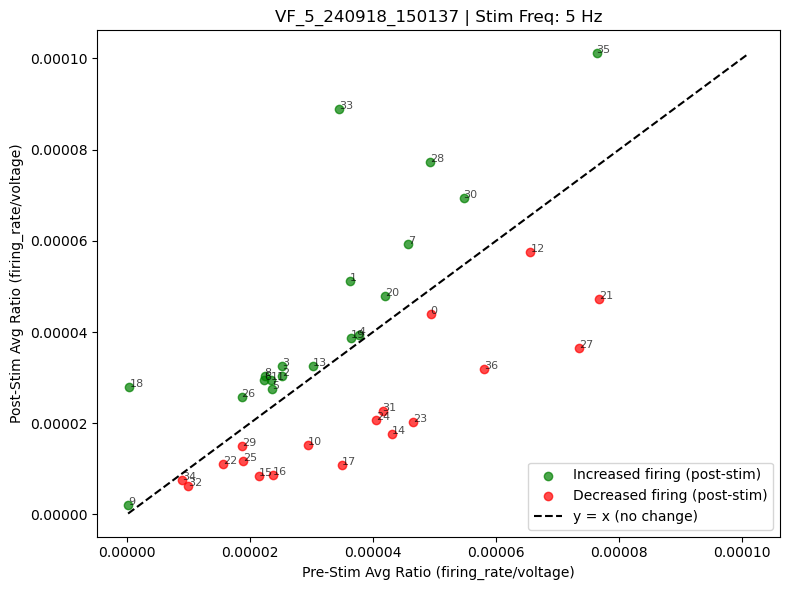

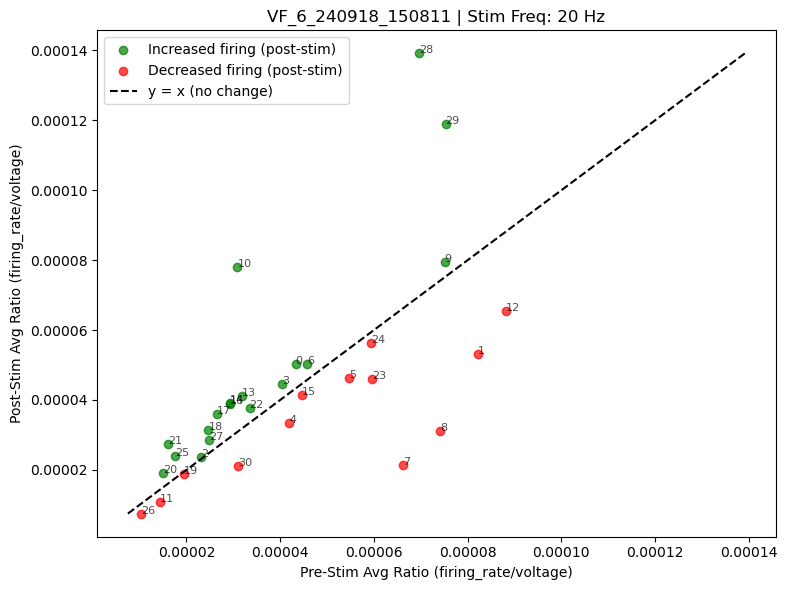

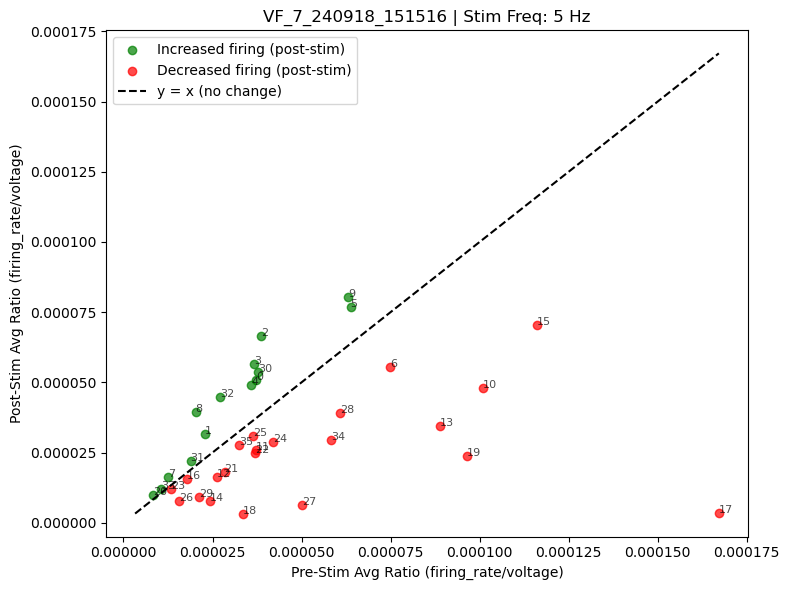

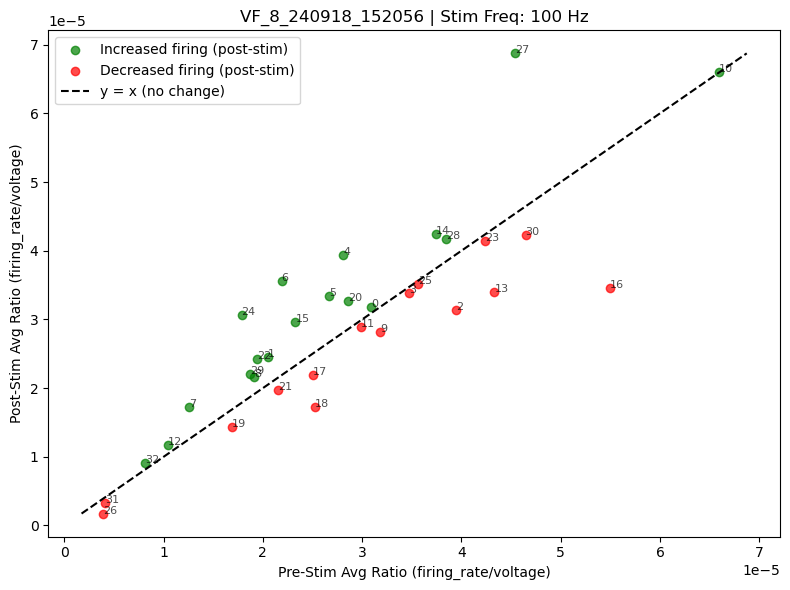

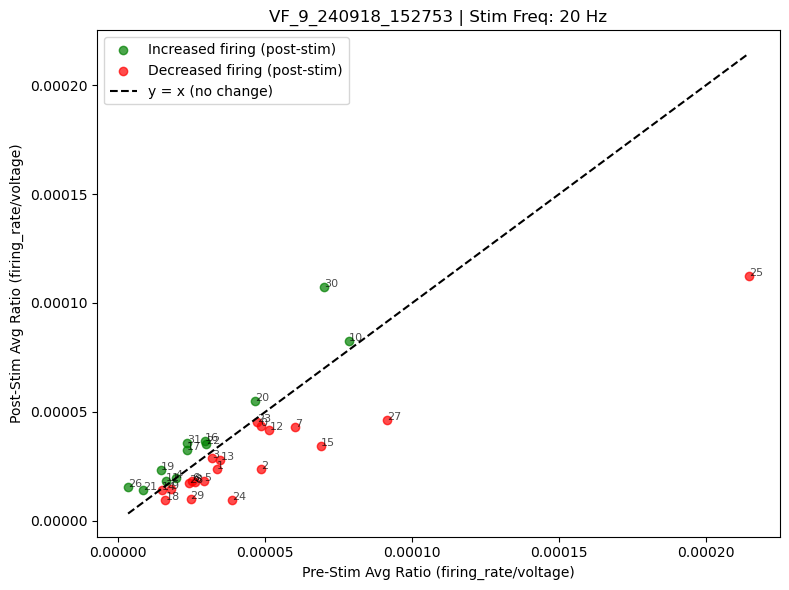

In [27]:
plots.vf_pre_post_stim_per_trial(VF_test)

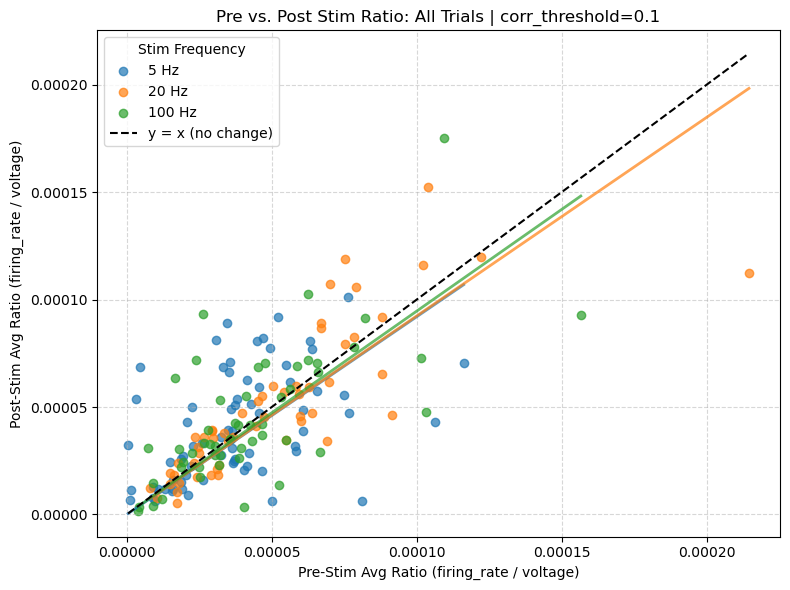

In [28]:
plots.vf_pre_post_stim_all_trials_correlated(VF_test)

# 📊 Calculate firing rate per cluster - `DW323`

---

In [29]:
VF_test = analysis_functions.VonFreyAnalysis(DW323, signals_DW323, spikes_DW323)
VF_test.analyze_subwindows(subwindow_width=0.5,corr_threshold=0.1)

{'VF_1_240911_164342': {'avg_voltage_df':       avg_voltage      group
  0   306448.656250   pre-stim
  1   374168.718750   pre-stim
  2   426255.656250   pre-stim
  3   282233.093750   pre-stim
  4   376215.156250   pre-stim
  5   537272.062500   pre-stim
  6   415997.562500   pre-stim
  7   377662.718750   pre-stim
  8   474467.875000   pre-stim
  9   446821.875000   pre-stim
  10  302029.468750   pre-stim
  11  410840.125000   pre-stim
  12  504451.593750   pre-stim
  13  626599.000000   pre-stim
  14  704396.250000   pre-stim
  15  717460.687500   pre-stim
  16  562653.187500   pre-stim
  17  363045.718750   pre-stim
  18  365595.812500   pre-stim
  19  420641.906250   pre-stim
  20  559199.500000   pre-stim
  21  610545.812500   pre-stim
  22  674968.625000   pre-stim
  23  543435.187500   pre-stim
  24  454410.031250   pre-stim
  25  561692.125000   pre-stim
  26  752206.000000   pre-stim
  27  769986.125000   pre-stim
  28  572470.000000   pre-stim
  29  411670.312500   pre-stim

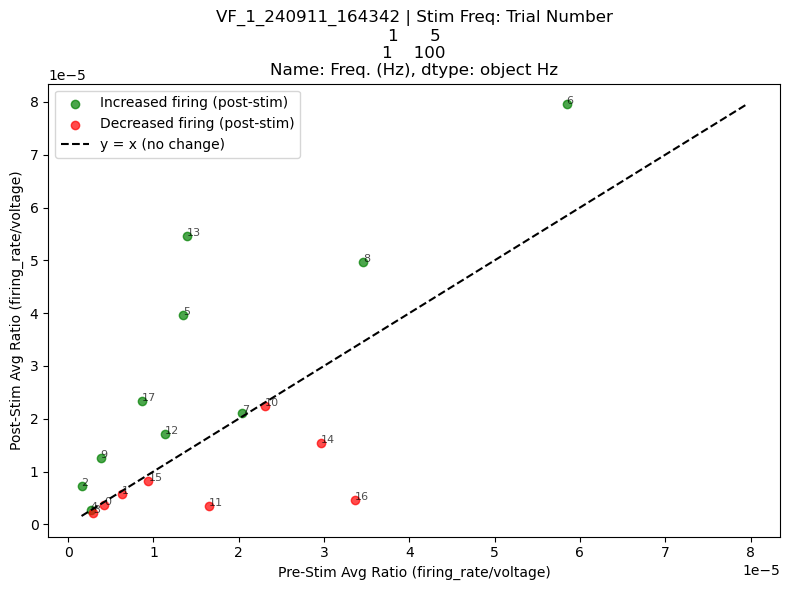

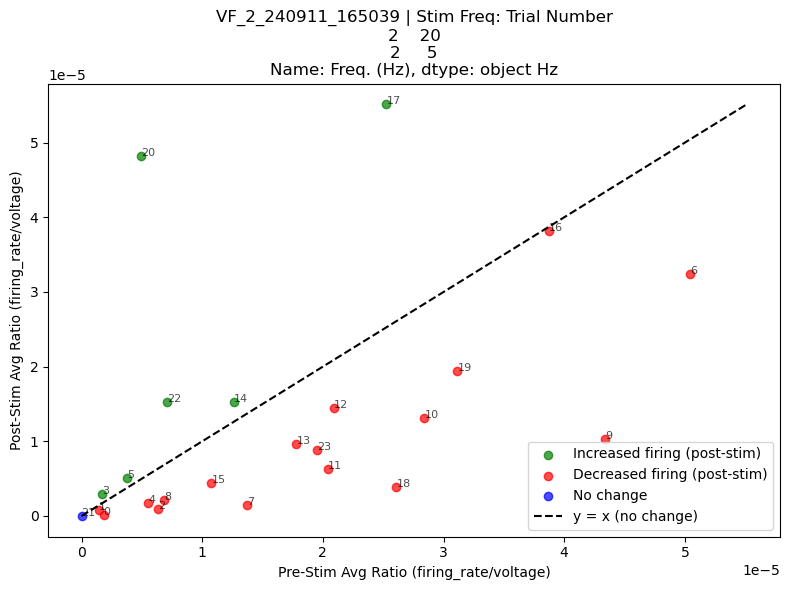

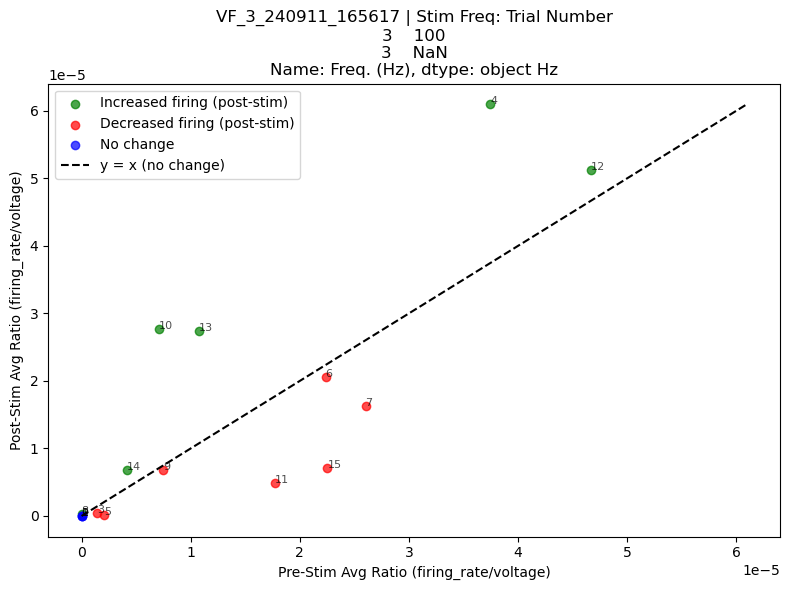

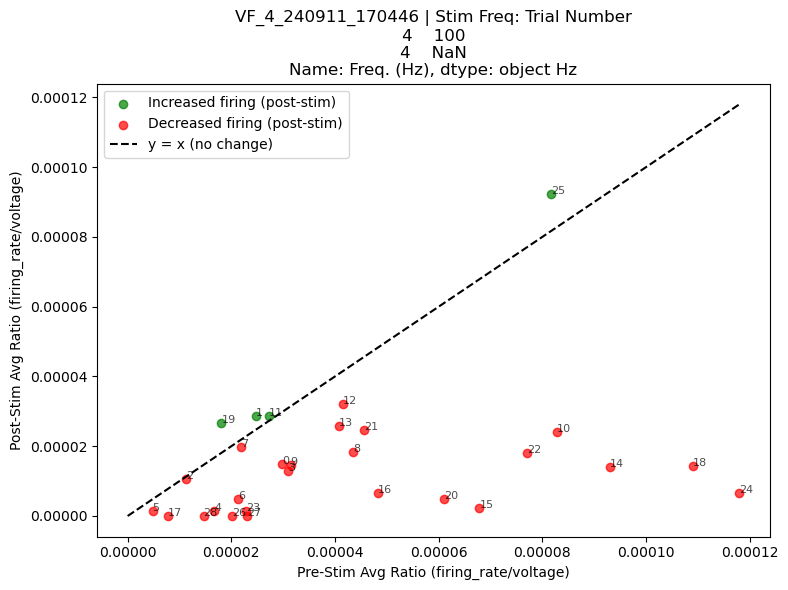

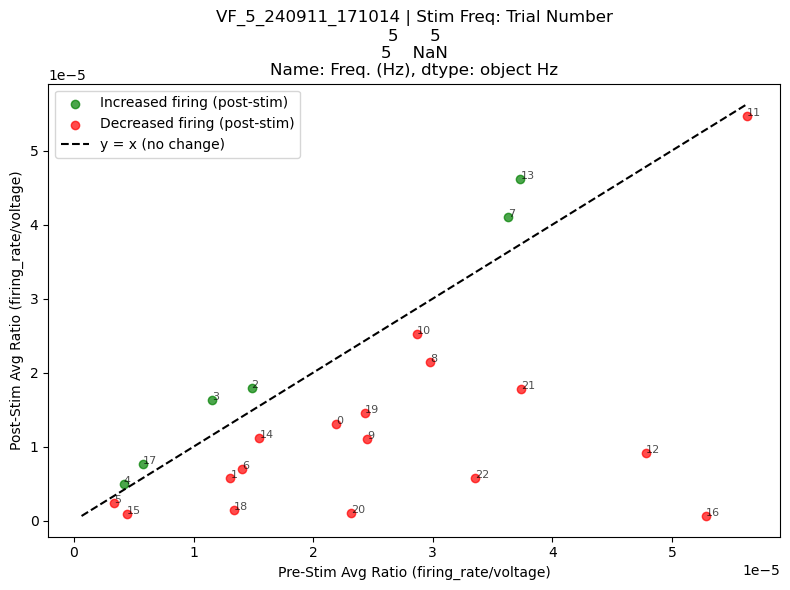

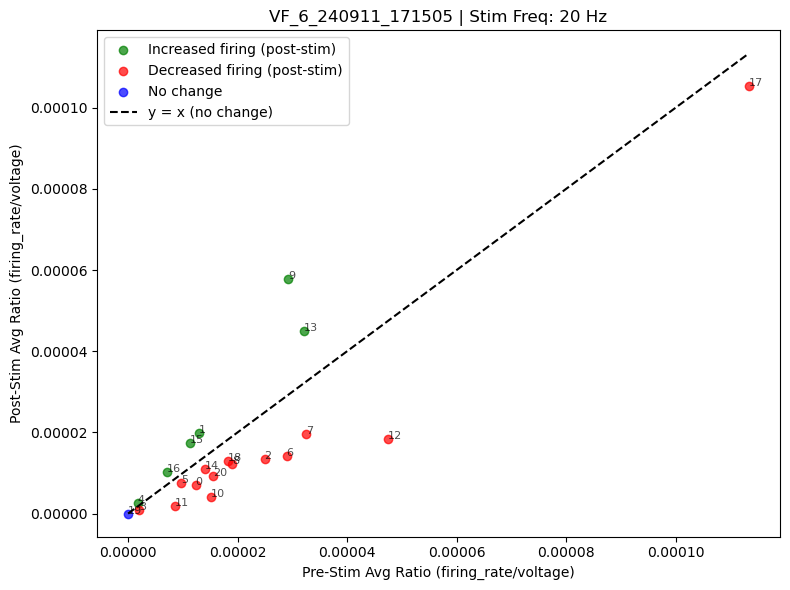

Trial number 7 not found in qst_trial_notes.


In [30]:
plots.vf_pre_post_stim_per_trial(VF_test)

Trial number 7 not found in qst_trial_notes.


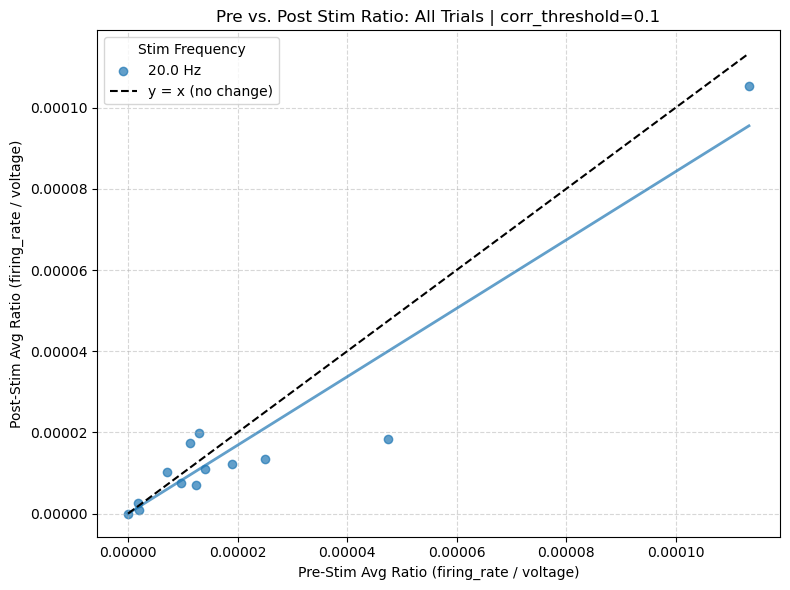

In [31]:
plots.vf_pre_post_stim_all_trials_correlated(VF_test)

# ⤵️ save data

In [32]:
signals_DW327.export_raw_spikes_and_von_frey_all_trials(spikes_DW237)
signals_DW322.export_raw_spikes_and_von_frey_all_trials(spikes_DW322)
signals_DW323.export_raw_spikes_and_von_frey_all_trials(spikes_DW323)

Spike data exported for trial VF_10_241125_162725 to D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.006 Von Vrey Analysis\DW327\tables\VF_10_241125_162725_spikes.csv
Von Frey data exported for trial VF_10_241125_162725 to D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.006 Von Vrey Analysis\DW327\tables\VF_10_241125_162725_von_frey.csv
Spike data exported for trial VF_1_241125_153746 to D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.006 Von Vrey Analysis\DW327\tables\VF_1_241125_153746_spikes.csv
Von Frey data exported for trial VF_1_241125_153746 to D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.006 Von Vrey Analysis\DW327\tables\VF_1_241125_153746_von_frey.csv
Spike data exported for trial VF_2_241125_154307 to D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.006 Von Vrey Analysis\DW327\tables\VF_2_241125_154307_spikes.csv
Von Frey data exported for trial VF_2_241125_154307 to D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.006 Von Vrey Analysis\DW327\tables\VF_2_241125_15430